# Cálculo de intersección entre conjuntos de palabras prototípicas

Esta notebook tiene el único propósito de comparar la cantidad de palabras prototípicas coincidentes entre:
- Las palabras elegidas por Assela
- Las palabras elegidas por los psiquiatras
- Las palabras del paper de prototipicalidad emocional
    - Para todo el conjunto 
    - Para las altamente prototípicas

In [1]:
import pandas as pd 
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Medida Jaccard que mide la proporción de elementos de un conjunto en otro
def jaccard(s1: set, s2: set):
    return len(s1 & s2) / len(s1 | s2)   

In [3]:
def coinsidencia(conjuntoA, conjuntoB):
    matches = []
    for palabra in conjuntoA:
        if palabra in conjuntoB:
            matches.append(palabra)
    conteo = len(matches)
    return matches, conteo

In [4]:
#Cargar conjunto de datos en dfs de pandas
#Comenzando con 56 palabras prototípicas de Assela

with open('/home/m/MGP/maestria/proyecto_tesis/baseline/Palabras_proto/palabras_suicidio_esp.csv', encoding='utf-8-sig') as f:
    palabrasLing = pd.read_csv(f)

In [5]:
palabrasLing.head()

,Unnamed: 0,Palabra,Positiva o Negativa,pos-neg
0,0,bien,Positiva,1
1,1,nerviosa,Negativa,-1
2,2,mal,Negativa,-1
3,3,contenta,Positiva,1
4,4,difícil,Negativa,-1


In [6]:
#Cargar datos de palabras de psiquiatras

with open('/home/m/MGP/maestria/proyecto_tesis/baseline/Palabras_proto/clinical-prescores.csv', encoding='utf-8-sig') as f:
    palabrasPsiq = pd.read_csv(f)

In [7]:
palabrasPsiq.head()

,Unnamed: 0,word,c-prescore
0,0,lormetazepam,-5.0
1,1,mg,-5.0
2,2,mirtazapina,-5.0
3,3,fluoxetina,-5.0
4,4,alprazolam,-5.0


In [8]:
palabrasPsiq = palabrasPsiq.drop(['Unnamed: 0'], axis = 1)


In [9]:
palabrasPsiq.head()

,word,c-prescore
0,lormetazepam,-5.0
1,mg,-5.0
2,mirtazapina,-5.0
3,fluoxetina,-5.0
4,alprazolam,-5.0


In [10]:
indices = np.arange(24)

In [11]:
indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [12]:
palabrasPsiq = palabrasPsiq.drop(indices)

In [13]:
palabrasPsiq

,word,c-prescore
24,tomé,-5.0
25,pristiq,-5.0
26,dosis,-5.0
27,zolpidem,-5.0
28,orfidal,-5.0
...,...,...
334,aclaratorio,2.0
335,limpié,2.0
336,practicas,2.0
337,claros,2.0


In [14]:
indices = [25, 26, 27, 28, 29, 30, 31, 40, 78, 80, 83]

In [15]:
palabrasPsiq = palabrasPsiq.drop(indices)

In [16]:
palabrasPsiq = palabrasPsiq.reset_index()

In [17]:
palabrasPsiq

,index,word,c-prescore
0,24,tomé,-5.0
1,32,marginada,-5.0
2,33,suicidarme,-5.0
3,34,lastimarme,-5.0
4,35,harto,-5.0
...,...,...,...
299,334,aclaratorio,2.0
300,335,limpié,2.0
301,336,practicas,2.0
302,337,claros,2.0


In [18]:
#Cargar datos de EmoPro

with open('/home/m/MGP/maestria/proyecto_tesis/baseline/EmoPro/13428_2020_1519_MOESM2_ESM.csv', encoding = 'utf-8-sig') as f:
    PalabrasEmoPro = pd.read_csv(f)

In [19]:
PalabrasEmoPro['POS']

0       ADJECTIVE
1            VERB
2            NOUN
3       ADJECTIVE
4            NOUN
          ...    
1281    ADJECTIVE
1282         NOUN
1283         VERB
1284         NOUN
1285    ADJECTIVE
Name: POS, Length: 1286, dtype: object

In [20]:
#Medidas, conteos y recuperación de palabras de lingüístas vs psiquiatras
jaccAvPS = jaccard(set(palabrasLing['Palabra']), set(palabrasPsiq['word']))

print('Jaccard de Palabras Prototípicas Seleccionadas por lingüísta vs psiquiatras:', jaccAvPS)


Jaccard de Palabras Prototípicas Seleccionadas por lingüísta vs psiquiatras: 0.03142857142857143


In [21]:
matches, conteo = coinsidencia(list(palabrasPsiq['word']), list(palabrasLing['Palabra']))
print(matches)
print(conteo)

['morir', 'cansado', 'dormida', 'dormido', 'noche', 'futuro', 'vivir', 'vida', 'adelante', 'descansado', 'despierta']
11


In [22]:
# Jaccard de lingüísta vs EmoPro

jaccAvEP = jaccard(set(palabrasLing['Palabra']), set(PalabrasEmoPro['Word']))

print('Jaccard de Palabras Prototípicas Seleccionadas por lingüísta vs EmoPro:', jaccAvEP)


Jaccard de Palabras Prototípicas Seleccionadas por lingüísta vs EmoPro: 0.010534236267870579


In [23]:
matches, conteo = coinsidencia(list(palabrasLing['Palabra']), list(PalabrasEmoPro['Word']))
print(matches)
print(conteo)

['triste', 'tranquilo', 'relajado', 'alegre', 'cansado', 'negativo', 'nervioso', 'positivo', 'tenso', 'bueno', 'malestar', 'bienestar', 'buena', 'duro']
14


In [ ]:
#Jaccard de Psiquiatras vs EmoPro

jaccPsvEP = jaccard(set(palabrasPsiq['word']), set(PalabrasEmoPro['Word']))

print('Jaccard de Palabras Prototípicas Seleccionadas por psiquiatras vs EmoPro:', jaccPsvEP)


Jaccard de Palabras Prototípicas Seleccionadas por lingüísta vs EmoPro: 0.01338432122370937


In [25]:
matches, conteo = coinsidencia(list(palabrasPsiq['word']), list(PalabrasEmoPro['Word']))
print(matches)
print(conteo)

['harto', 'molestia', 'agotamiento', 'enojo', 'odiar', 'indiferencia', 'acongojado', 'alboroto', 'alterado', 'fatigado', 'agotado', 'apático', 'cansado', 'herida', 'dolorido', 'animarse', 'felicidad', 'paz', 'placentero', 'afán', 'emoción']
21


## Gráfica de pastel de palabras por su POS

In [26]:
# Graficar distribución de EmoPro

Conteos = PalabrasEmoPro['POS'].value_counts()

In [27]:
Conteos.index = ['Adjetivos', 'Sustantivos', 'Verbos']

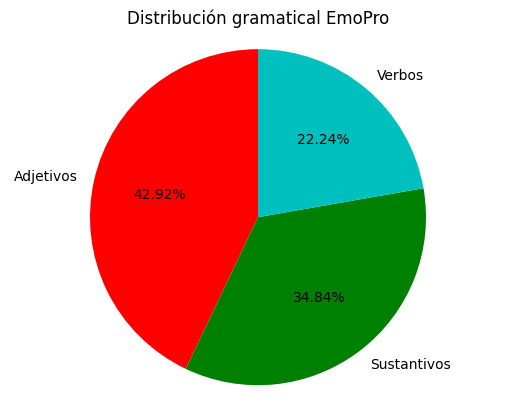

In [28]:
labels =  ['Adjetivos', 'Sustantivos', 'Verbos']
colores = ['r', 'g', 'c']
plt.pie(Conteos, labels=labels, colors= colores, startangle=90, autopct= '%1.2f%%')

plt.axis('equal')
plt.title('Distribución gramatical EmoPro')
plt.show()


In [29]:
PalabrasEmoPro.columns

Index(['Word', 'Few_Raters', 'Prototypicality_Mean', 'Prototypicality_SD',
       'Prototypicality_NRaters', 'Prototypicality_%Raters', 'Valence_Mean',
       'Valence_SD', 'Valence_NRaters', 'Valence_%Raters', 'Valence_Source',
       'Arousal_Mean', 'Arousal_SD', 'Arousal_NRaters', 'Arousal_%Raters',
       'Arousal_Source', 'Happiness_Mean', 'Happiness_SD', 'Happiness_NRaters',
       'Happiness_%Raters', 'Happiness_Source', 'Disgust_Mean', 'Disgust_SD',
       'Disgust_NRaters', 'Disgust_%Raters', 'Disgust_Source', 'Anger_Mean',
       'Anger_SD', 'Anger_NRaters', 'Anger_%Raters', 'Anger_Source',
       'Fear_Mean', 'Fear_SD', 'Fear_NRaters', 'Fear_%Raters', 'Fear_Source',
       'Sadness_Mean', 'Sadness_SD', 'Sadness_NRaters', 'Sadness_%Raters',
       'Sadness_Source', 'AoA_Mean', 'AoA_SD', 'AoA_NRaters', 'AoA_%Raters',
       'AoA_Source', 'Concreteness_Mean', 'Concreteness_SD',
       'Concreteness_NRaters', 'Concreteness_%Raters', 'Concreteness_Source',
       'Zipf_EsPal', 'P

In [30]:
PalabrasAltas = PalabrasEmoPro[PalabrasEmoPro['Prototypicality_Mean']>=3]

In [31]:
PalabrasAltas

,Word,Few_Raters,Prototypicality_Mean,Prototypicality_SD,Prototypicality_NRaters,Prototypicality_%Raters,Valence_Mean,Valence_SD,Valence_NRaters,Valence_%Raters,...,Concreteness_%Raters,Concreteness_Source,Zipf_EsPal,POS,Emotionality,Family,Very_related_emotions,Pure_word,Dominant_emotion,Emotional_exclusivity
3,abatido,NaN,3.37,1.42,20,0.95,2.77,1.75,26,1.00,...,1.00,NEW,3.59,ADJECTIVE,2.23,abatir,1.0,1.0,sadness,0.379
4,abatimiento,NaN,3.00,1.37,20,0.90,2.80,1.32,20,1.00,...,1.00,NEW,3.28,NOUN,2.20,abatir,1.0,1.0,sadness,0.340
6,abochornado,NaN,3.90,1.37,21,0.95,2.45,1.28,20,1.00,...,0.95,NEW,2.24,ADJECTIVE,2.55,bochorno,2.0,0.0,anger,0.264
7,abochornarse,NaN,3.84,1.54,21,0.90,3.44,2.18,26,0.96,...,0.95,NEW,0.51,VERB,1.56,bochorno,0.0,0.0,anger,0.248
13,abrumado,NaN,3.24,1.48,22,0.95,3.90,1.48,20,1.00,...,1.00,NEW,3.24,ADJECTIVE,1.10,abrumar,0.0,0.0,sadness,0.269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,vergonzoso,NaN,3.60,1.31,20,1.00,2.55,1.28,20,1.00,...,1.00,NEW,3.57,ADJECTIVE,2.45,vergüenza,0.0,0.0,sadness,0.294
1271,vergüenza,NaN,4.38,0.97,21,1.00,3.85,1.18,20,1.00,...,1.00,NEW,4.37,NOUN,1.15,vergüenza,1.0,1.0,fear,0.260
1273,victorioso,NaN,3.70,1.13,20,1.00,7.05,1.47,20,1.00,...,NaN,Hinojosa2016_BRM,3.55,ADJECTIVE,2.05,victoria,1.0,1.0,happiness,0.813
1279,violentarse,NaN,3.05,1.47,21,0.90,1.80,1.11,20,1.00,...,0.95,NEW,1.63,VERB,3.20,violento,3.0,0.0,anger,0.295


In [32]:
conteos = PalabrasEmoPro[['Happiness_Mean', 'Sadness_Mean', 'Fear_Mean', 'Anger_Mean','Disgust_Mean']]

In [33]:
conteos

,Happiness_Mean,Sadness_Mean,Fear_Mean,Anger_Mean,Disgust_Mean
0,1.03,4.30,3.33,2.83,1.77
1,1.15,4.05,3.00,2.76,2.93
2,1.03,4.43,3.33,3.30,2.63
3,1.10,3.85,2.81,2.90,1.60
4,1.20,3.47,2.58,2.21,2.22
...,...,...,...,...,...
1281,2.90,1.25,1.10,1.15,1.15
1282,4.23,1.13,1.13,1.03,1.03
1283,4.20,1.15,1.42,1.26,1.12
1284,1.50,3.40,2.90,2.11,1.68


ValueError: 'labels' must be of length 'x', not 5

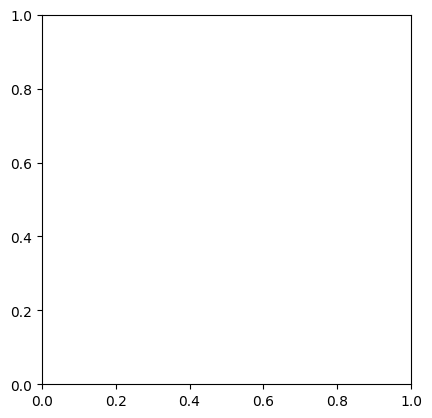

In [34]:
labels = ['Happiness_Mean', 'Sadness_Mean', 'Fear_Mean', 'Anger_Mean','Disgust_Mean']
colores = ['y', 'b', 'p', 'r','g']

plt.pie(Conteos, labels=labels, colors= colores, startangle=90, autopct= '%1.2f%%')

plt.axis('equal')
plt.title('Distribución gramatical EmoPro')
plt.show()